# Model Training
## 1.1 Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [12]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('../data/stud.csv')

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
X = df.drop(columns=['math_score'])
y = df['math_score']

In [15]:
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [20]:
y.head() 

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [21]:
num_cols = [ cols for cols in X.columns if X[cols].dtype in ['int64','float64']]
cat_cols = [ cols for cols in X.columns if X[cols].dtype == 'object']
print(f'Numerical Columns: {num_cols}')
print(f'Categorical Columns: {cat_cols}')


Numerical Columns: ['reading_score', 'writing_score', 'average_score', 'total_score']
Categorical Columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([("OneHotEncoder", categorical_transformer, cat_cols),
                                 ("StandardScaler", numerical_transformer, num_cols)])

In [24]:
X = preprocessor.fit_transform(X)

In [28]:
X,y

(array([[ 1.        ,  0.        ,  0.        , ...,  0.39149181,
          0.34357423,  0.34357423],
        [ 1.        ,  0.        ,  0.        , ...,  1.31326868,
          1.0219275 ,  1.0219275 ],
        [ 1.        ,  0.        ,  0.        , ...,  1.64247471,
          1.74706375,  1.74706375],
        ...,
        [ 1.        ,  0.        ,  0.        , ..., -0.20107904,
         -0.19443008, -0.19443008],
        [ 1.        ,  0.        ,  0.        , ...,  0.58901542,
          0.46053169,  0.46053169],
        [ 1.        ,  0.        ,  0.        , ...,  1.18158627,
          1.06871048,  1.06871048]], shape=(1000, 21)),
 0      72
 1      69
 2      90
 3      47
 4      76
        ..
 995    88
 996    62
 997    59
 998    68
 999    77
 Name: math_score, Length: 1000, dtype: int64)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 21), (200, 21), (800,), (200,))

In [30]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [31]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

models_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    models_list.append(list(models.keys())[i])
    r2_list.append(test_r2)
    
    print(f"Model: {list(models.keys())[i]}")
    print(f"Training Set: MAE={train_mae}, MSE={train_mse}, RMSE={train_rmse}, R2={train_r2}")
    print(f"Test Set: MAE={test_mae}, MSE={test_mse}, RMSE={test_rmse}, R2={test_r2}")
    print("-"*50)
    




Model: Random Forest
Training Set: MAE=0.8461250000000001, MSE=1.23448425, RMSE=1.1110734674178842, R2=0.9945242935627935
Test Set: MAE=2.16815, MSE=9.1127705, RMSE=3.018736573469106, R2=0.9625510379783873
--------------------------------------------------
Model: Decision Tree
Training Set: MAE=0.0, MSE=0.0, RMSE=0.0, R2=1.0
Test Set: MAE=3.085, MSE=15.575, RMSE=3.946517452134223, R2=0.9359944834025373
--------------------------------------------------
Model: KNN
Training Set: MAE=3.38375, MSE=18.31055, RMSE=4.2790828456574665, R2=0.9187813076563818
Test Set: MAE=4.045999999999999, MSE=26.8204, RMSE=5.1788415693087195, R2=0.889781473043301
--------------------------------------------------
Model: Linear Regression
Training Set: MAE=1.3221423955656065e-13, MSE=2.699898536224259e-26, RMSE=1.6431367977816878e-13, R2=1.0
Test Set: MAE=1.3464784842653898e-13, MSE=2.883873521096283e-26, RMSE=1.6981971384666396e-13, R2=1.0
--------------------------------------------------
Model: Ridge
Traini

In [33]:
pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
3,Linear Regression,1.000000
4,Ridge,0.999516
7,XGBRegressor,0.977101
8,CatBoosting Regressor,0.968100
0,Random Forest,0.962551
1,Decision Tree,0.935994
9,AdaBoost Regressor,0.929246
5,Lasso,0.908560
2,KNN,0.889781
6,SVR,0.794023


In [34]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

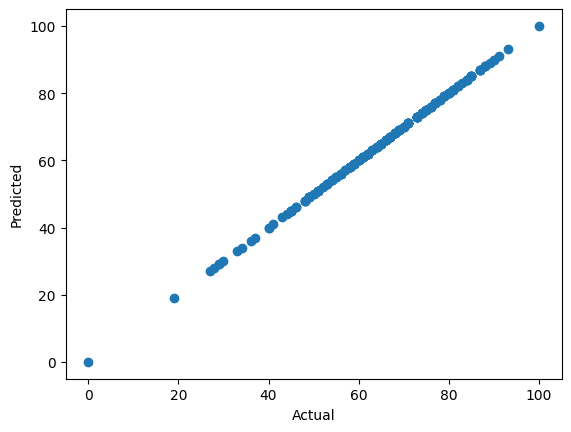

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

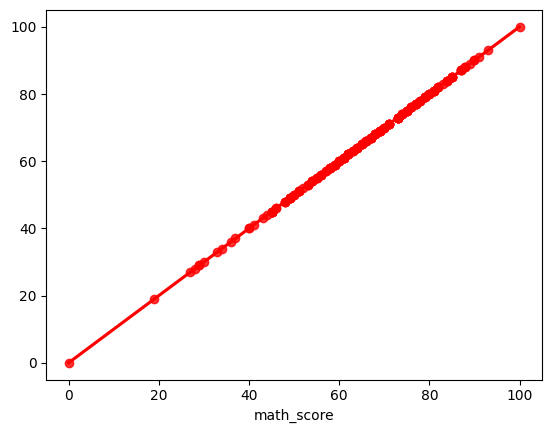

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [38]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,91.0,-2.273737e-13
737,53,53.0,2.842171e-14
740,80,80.0,-8.526513e-14
660,74,74.0,-8.526513e-14
411,84,84.0,-1.563194e-13
...,...,...,...
408,52,52.0,1.136868e-13
332,62,62.0,1.207923e-13
208,74,74.0,-9.947598e-14
613,65,65.0,-7.105427e-14
